# Prepare the files and the data to perform the unfolding of $\tau \rightarrow \pi \pi_0 \nu$


## Generate response matrix from a ROOT ntuple
Define the input file and its metadata

In [3]:
# Select the file and the tree from which to generate the response matrix
response_generator_file = "/storage/cpegueros/tau2pipi0_taupair_1623721564_00/sub00/prep30/*.root"
# Amount of bins and histogram limits
nbins, rmin, rmax = 50, 0.2, 1.8

Define the fields to load as the truth and the simulated variables

In [4]:
from utils import compute_response_and_histograms, store_root_objects_in_file

def get_truth(event):
    return event.tau_sig_matchedMC_InvM

def get_detected(event):
    return event.tau_sig_InvM

# Compute the histograms and the response matrix of the training set
truth_histogram, detected_histogram, response = compute_response_and_histograms(
    response_generator_file, "tau1x1",
    get_truth, get_detected,
    histogram_metadata=(nbins, rmin, rmax),
    variable_name="invariant mass"
)

# Store the files in a new root_file
store_root_objects_in_file(
    "./response_matrix.root",
    truth_histogram, detected_histogram, response
)

print("DONE")

DONE
Warning in <TROOT::Append>: Replacing existing TH1: truth (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: detected (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


### Example: loading objects created by `compute_response_and_histograms`
Read the histograms from the ROOT file and plot them

In [5]:
from utils import load_response_and_histograms

# Read the histograms of the given file
histograms_container_path = "./data/response_training_tau_pipi0_BGx1.root"
histograms = load_response_and_histograms(histograms_container_path)

# Turn ROOT objects into python objects
xini, xini_edges = histograms[0]
bini, bini_edges = histograms[1]
Adet, Adet_edges = histograms[2]

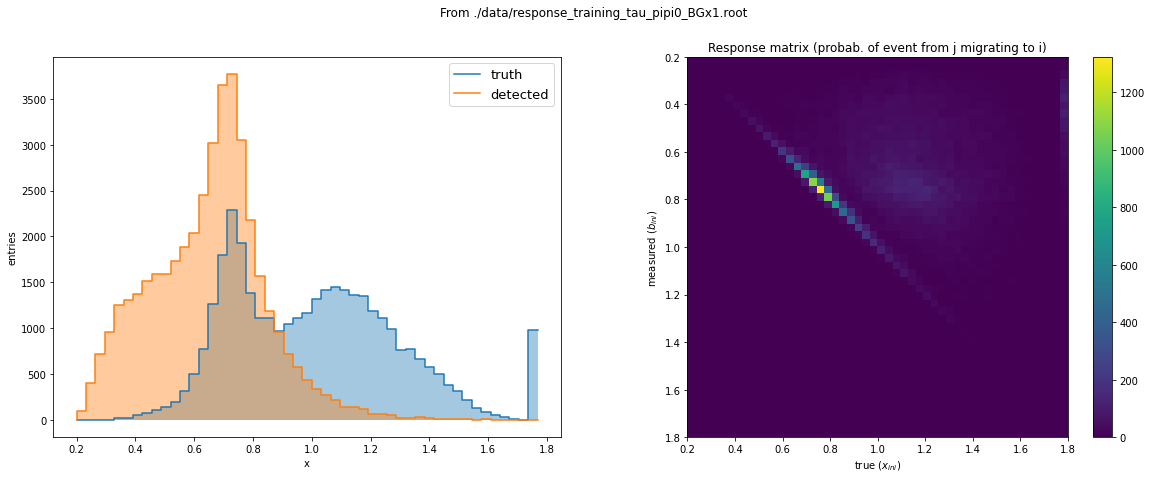

In [6]:
import pylab as plt
%matplotlib inline

axis = xini_edges[0][:-1]

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle(f"From {histograms_container_path}")

"""
Left-hand side
"""
# plot x_ini
axs[0].step(axis, xini, fillstyle="bottom", label="truth")
axs[0].fill_between(axis, xini, step="pre", alpha=0.4)
# plot b_ini
axs[0].step(axis, bini, fillstyle="bottom", label="detected")
axs[0].fill_between(axis, bini, step="pre", alpha=0.4)

axs[0].set_xlabel("x")
axs[0].set_ylabel("entries")
axs[0].legend(prop={'size': 13})

"""
Right-hand side
"""
# Show response matrix
left_edge  = xini_edges[0][0]
right_edge = xini_edges[0][-1]
bottom_edge  = bini_edges[0][-1]
top_edge = bini_edges[0][0]
im = axs[1].imshow(Adet, extent=[left_edge, right_edge, bottom_edge, top_edge])
axs[1].set_xlabel("true ($x_{ini}$)")
axs[1].set_ylabel("measured ($b_{ini}$)")
axs[1].set_title("Response matrix (probab. of event from j migrating to i)")
fig.colorbar(im, ax=axs[1])